In [7]:
from pulp import LpVariable, LpProblem, LpStatus, value, LpMinimize, LpMaximize
import matplotlib.pyplot as plt
import numpy as np

## Question 1

SteelCo manufactures three types of steel at two different steel mills. During a given month, Mill 1 has 200 hours of blast furnace time available, whereas Mill 2 has 300 hours. Because of differences in the furnaces at each mill, the time and cost to produce a ton of steel differs for each mill and are shown in the following table. Each month, SteelCo must manufacture a total of at least 400 tons of Steel 1, 500 tons of Steel 2, and 300 tons of Steel 3 to meet demand; however, the total amount of Steel 2 manufactured should not exceed the combined amount of Steel 1 and Steel 3. Also, in order to maintain a roughly uniform usage of the two mills, management’s policy is that the percentage of available blast furnace capacity (time) used at each mill should be the same. Clearly formulate a linear program (LP) to minimize the cost of manufacturing the desired steel

In [14]:
# define variables
M1S1 = LpVariable("M1S1", 0, None) # number of non-negative M1S1's needed
M1S2 = LpVariable("M1S2", 0, None) # number of non-negative M1S2's needed
M1S3 = LpVariable("M1S3", 0, None) # number of non-negative M1S3's needed
M2S1 = LpVariable("M2S1", 0, None) # number of non-negative M2S1's needed
M2S2 = LpVariable("M2S2", 0, None) # number of non-negative M2S2's needed
M2S3 = LpVariable("M2S3", 0, None) # number of non-negative M2S3's needed

In [15]:
# define the problem
problem = LpProblem("problem", LpMinimize)

In [24]:
# define the functional constraints
problem += 20*M1S1 + 22*M1S2 + 28*M1S3 <= 12000 # must be equal to or less than 200 hours or 12000 minutes
problem += 24*M2S1 + 18*M2S2 + 30*M2S3 <= 18000 # must be equal to or less than 300 hours or 18000 minutes

problem += 1*M1S1 + 1*M1S1 >= 400 # must manufacture at least 400 tons of S1
problem += 1*M1S2 + 1*M2S2 >= 500 # must manufacture at least 500 tons of S2
problem += 1*M1S3 + 1*M2S3 >= 300 # must manufacture at least 300 tons of S3

problem += 1*M1S2 + 1*M2S2 + 1*M1S3 + 1*M2S3 - 1*M1S2 - 1*M2S2 >= 0 # S2 should not exceed the combined amount of S1 and S3

problem += (20*M1S1 + 22*M1S2 + 28*M1S3)/12000 - (24*M2S1 + 18*M2S2 + 30*M2S3)/18000 == 0 # percentage of available blast furnace capacity (time) used at each mill should be the same.

In [17]:
# define the objective function
problem += 10*M1S1 + 11*M1S2 + 14*M1S3 + 12*M2S1 + 9*M2S2 + 10*M2S3

In [25]:
# solve
status = problem.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [26]:
# display results
for variable in problem.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(problem.objective)}")
print(f"")

M1S1 = 200.0
M1S2 = 235.29412
M1S3 = 0.0
M2S1 = 0.0
M2S2 = 264.70588
M2S3 = 300.0
Objective = 9970.58824



## Question 2

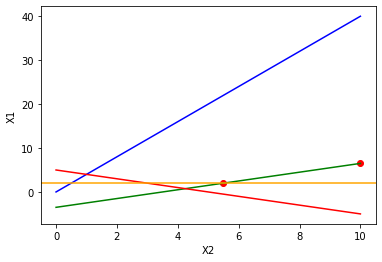

In [53]:
x1 = np.linspace(0, 10, 1000)

x2_1 = 4*x1
plt.plot(x1, x2_1, '-b')

x2_2 = x1 - 3.5
plt.plot(x1, x2_2, '-g')

x2_3 = -x1 + 5
plt.plot(x1, x2_3, '-r')

plt.axhline(2, 0, 10, color='orange')

plt.xlabel('X2')
plt.ylabel('X1')

plt.scatter(5.5,2, color='red')
plt.scatter(10,6.5, color='red')
plt.show()

In [40]:
def func(x, y):
    result = -4*y + 2*x
    return result

In [54]:
func(5.5, 2)

3.0

In [55]:
func(10, 6.5)

-6.0

## Question 3

At the beginning of month 1, Finco has $400 in cash. At the beginning of months 1, 2, 3, and 4, Finco receives certain revenues, after which it pays bills (see Table 2 below). Any money left over may be invested for one month at the interest rate of 0.1% per month; for two months at 0.5% per month; for three months at 1% per month; or for four months at 2% per month. Use linear programming to determine an investment strategy that maximizes cash on hand at the beginning of month 5. Formulate an LP to maximize Finco’s profit.

In [78]:
# define variables - Xi,j format where i is the amount invested at the beginging month i and matures at the end of month j
X11 = LpVariable("X11", 0, None) 
X12 = LpVariable("X12", 0, None) 
X13 = LpVariable("X13", 0, None) 
X14 = LpVariable("X14", 0, None) 
X22 = LpVariable("X22", 0, None) 
X23 = LpVariable("X23", 0, None) 
X24 = LpVariable("X24", 0, None) 
X33 = LpVariable("X33", 0, None) 
X34 = LpVariable("X34", 0, None)
X44 = LpVariable("X44", 0, None)

In [79]:
# define the problem
problem = LpProblem("problem", LpMaximize)

In [80]:
# define the functional constraints

problem += X11 + X12 + X13 + X14 + 600 == 400 + 400
problem += X22 + X23 + X24 + 500 == 800 + 1.001*X11
problem += X33 + X34 + 500 == 1.01*X12 + 1.001*X22 + 300
problem += X44 + 250 == 1.03*X13 + 1.01*X23 + 1.001*X33 + 300

In [81]:
# define the objective function
problem += 1.08*X14 + 1.03*X24 + 1.01*X34 + 1.001*X44

In [82]:
# solve
status = problem.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [83]:
# display results
for variable in problem.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(problem.objective)}")
print(f"")

X11 = 0.0
X12 = 0.0
X13 = 0.0
X14 = 200.0
X22 = 199.8002
X23 = 0.0
X24 = 100.1998
X33 = 0.0
X34 = 0.0
X44 = 50.0
Objective = 369.255794



## Question 4

Turkeyco produces two types of turkey cutlets for sale to fast-food restaurants. Each type of cutlet consists of white meat and dark meat. Cutlet 1 sells for \\$4/lb and must consist of at least 70\% white meat. Cutlet 2 sells for \$3 lb and must consist of at least 60\% white meat. At most, 50 lb of cutlet 1 and 30 lb of cutlet 2 can be sold. The two types of turkey used to manufacture the cutlets are purchased from the GobbleGobble Turkey Farm. Each type 1 turkey costs \\$10 and yields 5 lb of white meat and 2 lb of dark meat. Each type 2 turkey costs \\$8 and yields 3 lb of white meat and 3 lb of dark meat. 

In [69]:
# define variables
C1W = LpVariable("C1W", 0, None) # number of non-negative lb C1W's needed
C1D = LpVariable("C1D", 0, None) # number of non-negative lb C1D's needed
C2W = LpVariable("C2W", 0, None) # number of non-negative lb C2W's needed
C2D = LpVariable("C2D", 0, None) # number of non-negative lb C2D's needed
T1 = LpVariable("T1", 0, None) # number of non-negative number of T1's needed
T2 = LpVariable("T2", 0, None) # number of non-negative number of T2's needed

In [70]:
# define the problem
problem = LpProblem("problem", LpMaximize)

In [71]:
# define the functional constraints
problem += C1W + C1D <= 50
problem += C2W + C2D <= 30

problem += C1W + C2W <= 5*T1 + 3*T2
problem += C1D + C2D <= 2*T1 + 3*T2

problem += .7*(C1W + C1D) <= C1W
problem += .6*(C2W + C2D) <= C2W

In [72]:
# define the objective function
problem += 4*(C1W + C1D) + 3*(C2W + C2D) - (10*T1 + 8*T2)

In [73]:
# solve
status = problem.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [74]:
# display results
for variable in problem.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(problem.objective)}")
print(f"")

C1D = 15.0
C1W = 35.0
C2D = 12.0
C2W = 18.0
T1 = 8.6666667
T2 = 3.2222222
Objective = 177.55555539999997



## Question 5

A company wants to plan production for the ensuing year to minimize the combined cost of production and inventory costs. In each quarter of the year, demand is anticipated to be 130, 160, 250, and 150 units, respectively. The plant can produce a maximum of 200 units each quarter. The product can be manufactured at a cost of \\$15 per unit during the first quarter, however the manufacturing cost is expected to rise by \\$1 per quarter. Excess production can be stored from one quarter to the next at a cost of \\$1.50 per unit, but the storage facility can hold a maximum of 60 units. How should the production be scheduled so as to minimize the total costs?

In [52]:
# define variables
Q1 = LpVariable("Q1", 0, None) # number of non-negative Units manufactured in Q1
Q2 = LpVariable("Q2", 0, None) # number of non-negative Units manufactured in Q2
Q3 = LpVariable("Q3", 0, None) # number of non-negative Units manufactured in Q3
Q4 = LpVariable("Q4", 0, None) # number of non-negative Units manufactured in Q4

S1 = LpVariable("S1", 0, 60) # number of non-negative Units stored after Q1
S2 = LpVariable("S2", 0, 60) # number of non-negative Units stored after Q2
S3 = LpVariable("S3", 0, 60) # number of non-negative Units stored after Q3

In [53]:
# define the problem
problem = LpProblem("problem", LpMinimize)

In [54]:
# define the functional constraints

# Demand
problem += Q1 >= 130
problem += Q1 - 130 == S1

problem += S1 + Q2 >= 160
problem += S1 + Q2 - 160 == S2

problem += S2 + Q3 >= 250
problem += S2 + Q3 - 250 == S3

problem += S3 + Q4 >= 150

In [55]:
# define the objective function
problem += 15*Q1 + 16*Q2 + 17*Q3 + 18*Q4 + 1.5*S1 + 1.5*S2 + 1.5*S3

In [56]:
# solve
status = problem.solve()
print(f"status={LpStatus[status]}")

status=Optimal


In [57]:
# display results
for variable in problem.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {value(problem.objective)}")
print(f"")

Q1 = 130.0
Q2 = 160.0
Q3 = 250.0
Q4 = 150.0
S1 = 0.0
S2 = 0.0
S3 = 0.0
Objective = 11460.0

